In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt

In [9]:

# Load dataset
df = pd.read_csv("extracted_acceleration_features.csv")


In [10]:

# --- Exercise A1: Single-Feature Linear Regression ---
X = df[['rms_acc']]
y = df['arias_intensity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
print("A1: Single-Feature Regression Coeff:", lin_reg.coef_, "Intercept:", lin_reg.intercept_)


A1: Single-Feature Regression Coeff: [2.55586199] Intercept: -0.001697246132934097


In [11]:

# --- Exercise A2: Compute Evaluation Metrics ---
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("A2: MSE:", mse, "RMSE:", rmse, "MAPE:", mape, "R²:", r2)


A2: MSE: 1.0951804055125612e-05 RMSE: 0.0033093510021038283 MAPE: 63081913.20407546 R²: 0.9466827390918322


In [12]:

# --- Exercise A3: Multi-Feature Linear Regression ---
X_multi = df[['distance_to_event', 'spectral_centroid', 'mean_freq', 'sig_duration']]
y_multi = df['pga']
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)
multi_reg = LinearRegression()
multi_reg.fit(X_train_m, y_train_m)
y_pred_m = multi_reg.predict(X_test_m)
mse_m = mean_squared_error(y_test_m, y_pred_m)
rmse_m = np.sqrt(mse_m)
mape_m = mean_absolute_percentage_error(y_test_m, y_pred_m)
r2_m = r2_score(y_test_m, y_pred_m)
print("A3: Multi-Feature Regression Coeff:", multi_reg.coef_, "Intercept:", multi_reg.intercept_)
print("A3: MSE:", mse_m, "RMSE:", rmse_m, "MAPE:", mape_m, "R²:", r2_m)


A3: Multi-Feature Regression Coeff: [ 0.00848088  0.01786452  0.01786452 -0.00087768] Intercept: 0.1119376618304968
A3: MSE: 0.014599273814823845 RMSE: 0.12082745472293888 MAPE: 3636.429767745885 R²: 0.766116848120208


In [13]:

# --- Exercise A4: K-Means Clustering ---
numeric_df = df.drop(columns=['station_id', 'component'])
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(scaled_data)
df['cluster'] = clusters
print("A4: K-Means Cluster Centers:", kmeans.cluster_centers_)


A4: K-Means Cluster Centers: [[ 6.47288676e-02 -2.87186817e-02  1.95212192e-03  6.10829146e-02
  -2.02384596e-01 -2.13568800e-01 -1.85436858e-01  1.14996457e-01
  -1.48823025e-01 -1.40580481e-01 -1.40580481e-01 -1.29345298e-01
  -1.68891165e-01 -1.24105794e-01]
 [-1.83431692e+00  2.03685872e+00 -7.60801964e-01 -3.04967223e+00
   2.77600917e-01  8.21964292e-01  7.40345250e-02 -8.40617717e-01
  -3.47115600e-02  2.73000124e-01  2.73000124e-01  4.24253450e+00
   5.10822384e+00  1.59656704e-01]
 [-2.11568015e-01 -9.06781101e-01  5.70831836e-01  8.79265630e-01
   5.12686448e+00  4.97734930e+00  4.84507409e+00 -2.35440088e+00
   3.96544584e+00  3.49562898e+00  3.49562898e+00 -4.93935228e-02
   2.88483144e-01  3.15253417e+00]]


In [14]:

# --- Exercise A5: Clustering Evaluation Metrics ---
silhouette = silhouette_score(scaled_data, clusters)
calinski_harabasz = calinski_harabasz_score(scaled_data, clusters)
davies_bouldin = davies_bouldin_score(scaled_data, clusters)
print("A5: Silhouette Score:", silhouette, "Calinski-Harabasz:", calinski_harabasz, "Davies-Bouldin:", davies_bouldin)


A5: Silhouette Score: 0.6596784140530629 Calinski-Harabasz: 143.46027948790436 Davies-Bouldin: 0.7375511524333657


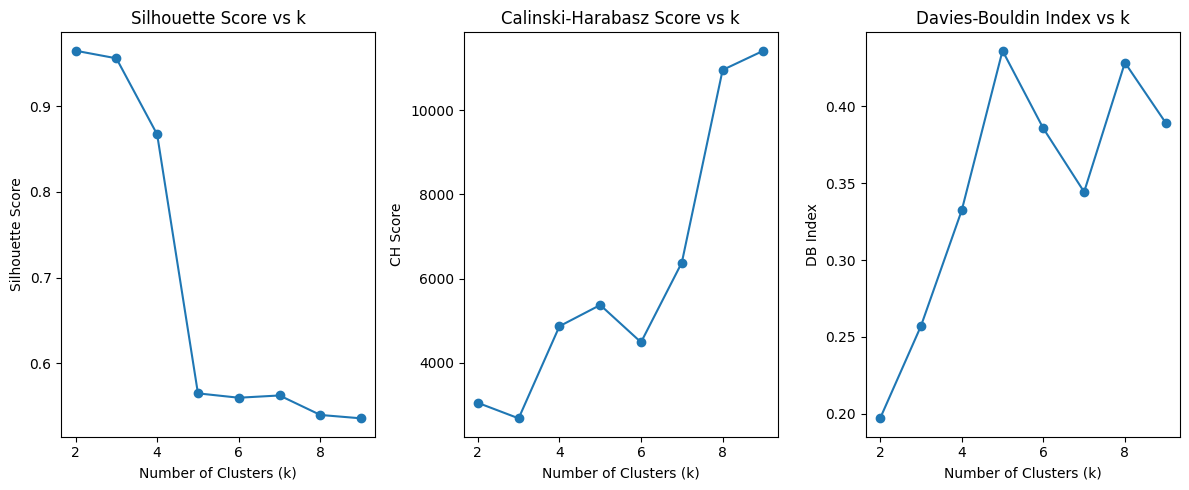

In [15]:
k_values = range(2, 10)
silhouette_scores, ch_scores, db_scores = [], [], []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto").fit(X_train)
    labels = kmeans.labels_

    silhouette_scores.append(silhouette_score(X_train, labels))
    ch_scores.append(calinski_harabasz_score(X_train, labels))
    db_scores.append(davies_bouldin_score(X_train, labels))

plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Score vs k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')

plt.subplot(1, 3, 2)
plt.plot(k_values, ch_scores, marker='o')
plt.title('Calinski-Harabasz Score vs k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('CH Score')

plt.subplot(1, 3, 3)
plt.plot(k_values, db_scores, marker='o')
plt.title('Davies-Bouldin Index vs k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('DB Index')

plt.tight_layout()
plt.show()


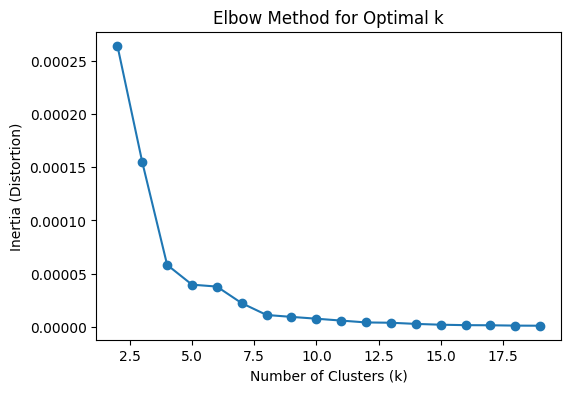

In [16]:
distortions = []

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto").fit(X_train)
    distortions.append(kmeans.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(range(2, 20), distortions, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Distortion)')
plt.title('Elbow Method for Optimal k')
plt.show()
